In [13]:
# import all the E9 stuff
import logging
import numpy as np
import matplotlib.pyplot as plt
import sys
from pathlib import Path
import time

# User defined modules
E9path = Path("C:/", "Users", "ken92", "Documents", "Studies", "E5", "simulation", "E9_simulations")
if str(E9path) not in sys.path:
    sys.path.insert(1, str(E9path))
import E9_fn.E9_constants as E9c
import E9_fn.E9_atom as E9a
import E9_fn.E9_cooltrap as E9ct
import E9_fn.plane_wave_expansion.blochstate_class as bsc
# import E9_fn.polarizabilities_calculation as E9pol
# import E9_fn.datasets.transition_line_data as TLData
from E9_fn import util

from projects.flat_band_cooling import helper_fns as hpfn

# Logging
logpath = '' # '' if not logging to a file
loglevel = logging.INFO
logroot = logging.getLogger()
list(map(logroot.removeHandler, logroot.handlers))
list(map(logroot.removeFilter, logroot.filters))
logging.basicConfig(filename = logpath, level = loglevel)

# Inputs

In [14]:
V_rsv_offsets = np.linspace(-3.5, 2., 12)
lattice_str = "kagome"
lattice_len = 20
sys_len = 12
util.set_custom_plot_style()
runnum = 1                      # e.g. runnum 2 will look at all the 2nd copy (folders with suffix _002)
param_dict = {                  # Additional parameters I have included so far
    # "Vran": 0.05,                # Random offset on each site (value specifies standard deviation)
    # "tnnn": -0.01,              # Next nearest neighbour hopping
    # "lres": 0.5,                # Resolution of the box potential (in units of lattice cell size)
    }

data_folder = Path(E9path, "projects", "flat_band_cooling", "eigvals_library")

# Plot energies of all eigenstates

Text(0.5, 0.98, 'kagome, lattice size (20, 20), system size 12x12')

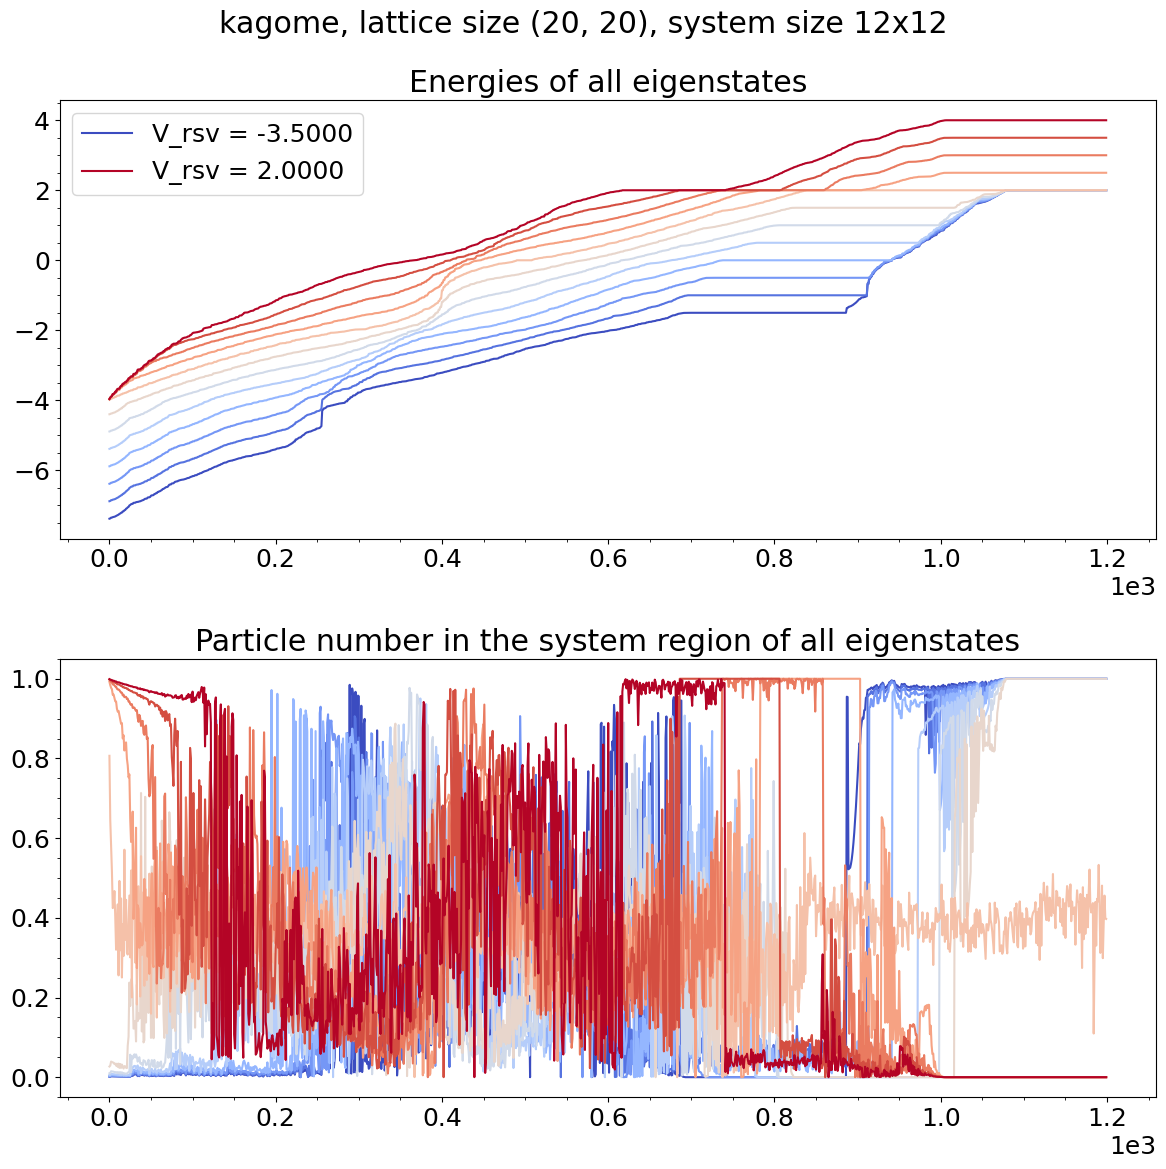

In [15]:
lattice_dim = (lattice_len, lattice_len)
# lattice_dim = (lattice_len, 1)

fig_Es = plt.figure(figsize = (12, 12))
ax_Es = fig_Es.add_subplot(211)
ax_nus = fig_Es.add_subplot(212)
ax_Es.clear()
ax_nus.clear()
cmap = plt.get_cmap('coolwarm')

for V_rsv in V_rsv_offsets:
    folder_name = hpfn.get_model_str(lattice_str, lattice_dim, sys_len, V_rsv, runnum, param_dict)
    with open(Path(data_folder, lattice_str, folder_name, "np_arrays.npz"), 'rb') as f:
        loaded_arrs_dict = np.load(f)
        eigvals = loaded_arrs_dict["eigvals"]
        density_sys = loaded_arrs_dict["density_sys"]
    color = util.get_color(V_rsv, V_rsv_offsets, cmap, assignment = "value")
    if (V_rsv == V_rsv_offsets[0]) or (V_rsv == V_rsv_offsets[-1]):
        label_str = f"V_rsv = {V_rsv:.4f}"
    else:
        label_str = ""
    ax_Es.plot(eigvals, label = label_str, color = color)
    ax_nus.plot(density_sys, color = color)

ax_Es.set_title("Energies of all eigenstates")
ax_Es.legend()
ax_nus.set_title("Particle number in the system region of all eigenstates")
fig_Es.suptitle(f"{lattice_str}, lattice size {lattice_dim}, system size {sys_len}x{sys_len}")